In [1]:
"""Import required packages"""

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from tkinter import Tk, filedialog
import numpy as np
import ezodf

In [3]:
""" Load dataset as Pandas dataframe """

# Function to open a file dialog and load an Excel or CSV file into a pandas DataFrame
def load_file():
    # Initialize Tkinter window (hidden)
    root = Tk()
    root.withdraw()  # Hide the root window

    # Prompt the user to select a file
    file_path = filedialog.askopenfilename(
        title="Select a file", 
        filetypes=[("Excel files", "*.xlsx *.xls"), ("OSD files", "*.ods"), ("CSV files", "*.csv"), ("All files", "*.*")]
    )

    # Check if a file was selected
    if file_path:
        try:
            if file_path.endswith('.csv'):
                # Load CSV file
                df = pd.read_csv(file_path)
            elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
                # Load Excel file
                df = pd.read_excel(file_path)
            elif file_path.endswith('.ods'):
                spreadsheet = ezodf.opendoc(file_path)
                sheet = spreadsheet.sheets[0]
                data = []
                for row in sheet.rows():
                    row_data = [cell.value for cell in row]
                    data.append(row_data)
                header = data[0]
                data = data[1:]
                df = pd.DataFrame(data, columns=header)
            else:
                print("Unsupported file type")
                return None
            
            print(f"File loaded successfully: {file_path}")
            return df
        except Exception as e:
            print(f"Error loading file: {e}")
            return None
    else:
        print("No file selected")
        return None

# Example usage
df = load_file()

# If the file was loaded successfully, print the first 5 rows
if df is not None:
    print(df.head())


File loaded successfully: /home/grominou/Desktop/datatest.xlsx
     months  montherror      d18Ow  d18Oerror
0  1.192258    0.143226  -8.007161   0.300468
1  2.521935    0.101613  -9.693120   0.389496
2  3.106452    0.078871 -10.744759   0.200312
3  5.305161    0.049839 -11.345695   0.166927
4  6.315484    0.103548 -11.646163   0.244826


Figure(800x600)


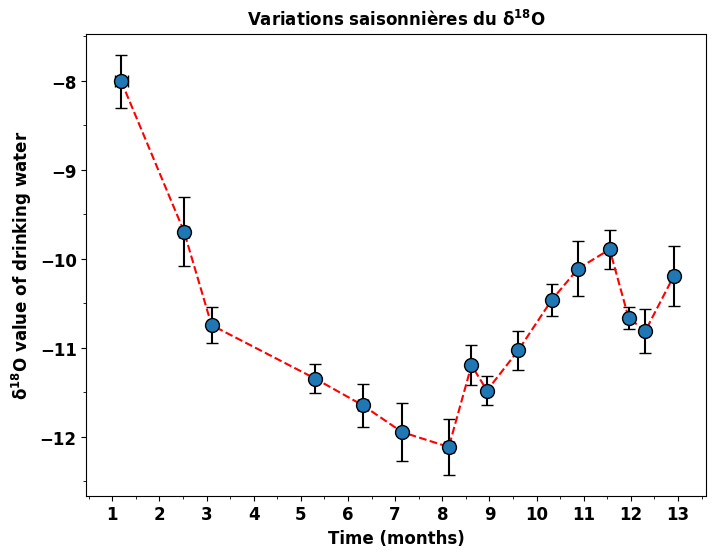

In [52]:
""" Function to plot points with error bars and a line connecting the points """

def plot_line_scatter_error(x_values, y_values, x_err=None, y_err=None):
    """
    Plots the evolution of values with a line connecting the points and
    both horizontal and vertical error bars.
    """

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the points
    ax.scatter(x_values, y_values, s=100, facecolor='C0', edgecolor='k', zorder=3)

    # Add the line connecting the points
    ax.plot(x_values, y_values, color='red', linestyle='--', zorder=2)

    # Add the error bars
    ax.errorbar(x_values, y_values, xerr=x_err, yerr=y_err, fmt='none', ecolor='black', elinewidth=1.5, capsize=4, zorder=1)
  
    # Add labels and a title
    ax.set_xlabel('Time (months)', fontsize=12, fontweight='bold')
    ax.set_ylabel(r'$\bf \delta^{18}$O value of drinking water',fontsize=12, fontweight='bold')
    ax.set_title(r'Variations saisonnières du $\bf \delta^{18}$O', fontweight='bold')

    # Modify ticks

    # ax.minorticks_on()
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))    # change ticker.MultipleLocator(X) X by a tick unit)
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # change ticker.MultipleLocator(X) X by a tick unit)
    plt.xticks(fontsize=12, fontweight='bold', rotation=0)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))    # change ticker.MultipleLocator(X) X by a tick unit)
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # change ticker.MultipleLocator(X) X by a tick unit)
    plt.yticks(fontsize=12, fontweight='bold', rotation=0)

    # Display grid
    # ax.grid(True)
    
    return fig


# Plot with horizontal and vertical error bars, and a connecting line
plot = plot_line_scatter_error(x_values=df['months'], y_values=df['d18Ow'], x_err=df['montherror'], y_err=df['d18Oerror'])
print(plot)


In [ ]:
""" Save the plot as a SVG file """

# Function to save the plot as a SVG file
def save_plot_as_png(plot):
     
    # Initialize Tkinter window (hidden)
    root = Tk()
    root.withdraw()  # Hide the root window

    # Prompt the user to select a directory and enter a file name
    file_path = filedialog.asksaveasfilename(
        title="Save Plot",
        defaultextension=".svg",
        filetypes=[("svg files", "*.svg"), ("All files", "*.*")]
    )

    # Check if a file path was provided
    if file_path:
        try:
            # Save the plot as a SVG file
            plot.savefig(file_path)
            print(f"Plot saved successfully: {file_path}")
        except Exception as e:
            print(f"Error saving file: {e}")
    else:
        print("No file selected")

save_plot_as_png(plot)